In [1]:
from urllib.request import urlopen

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
text = urlopen(url).read().decode()

In [2]:
from copy import copy
description_path = 'german_description.txt'

map_mask = []
attrs = []
fetch_attribute = False

with open(description_path) as f:
    for line in f:
        if 'Att' in line:
            fetch_attribute = True
            map_mask.append('qualitative' in line)
        elif fetch_attribute:
            strip = lambda s: s[0].upper() + s[1:-2]
            attrs.append(strip(line))
            fetch_attribute = False
map_mask.append(False)

In [3]:
raw_data = []
targets = []
for row in text.split('\n')[:-1]:
    components = row.strip().split()
    raw_data.append(components[:-1])
    targets.append(components[-1])

def numerize(i, s):
    l = 2 if i >= 10 else 1
    return int(s[(1 + l):])
    
for i, flag in enumerate(map_mask):
    if flag:
        for row in raw_data:
            row[i] = numerize(i, row[i])

In [4]:
from pandas import DataFrame as df
data = df(raw_data, columns=attrs)

In [5]:
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker
0,1,6,4,3,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1
1,2,48,2,3,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1
2,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1
3,1,42,2,2,7882,1,4,2,3,3,4,2,45,3,3,1,3,2,1,1
4,1,24,3,0,4870,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1


In [6]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [7]:
scores = []
for depth in range(1, 100):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    scores.append(cross_val_score(model, data, targets, cv=5).mean())

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

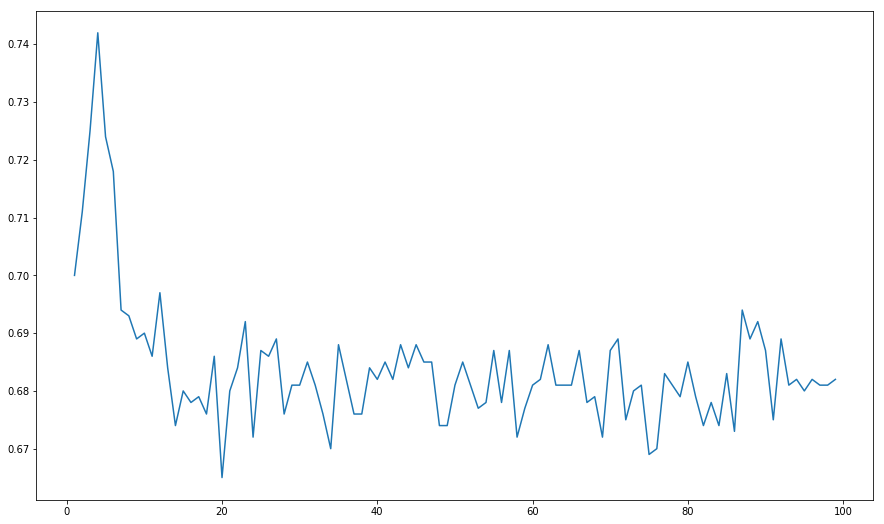

In [9]:
plt.figure(figsize=(15, 9))
plt.plot(range(1, 100), scores)

In [10]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(data, targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

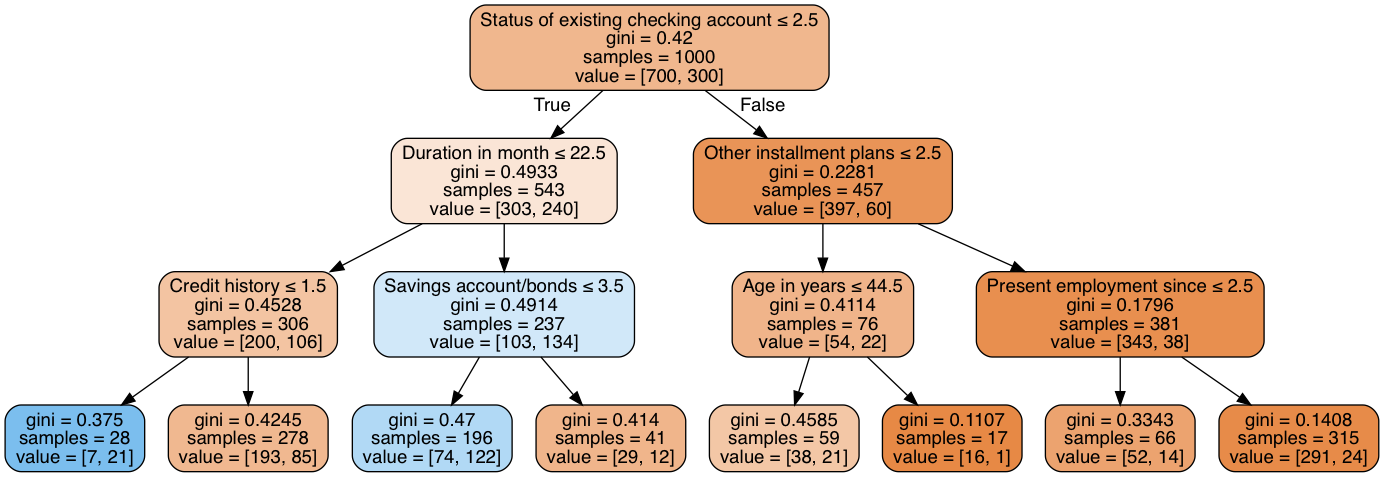

In [11]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                                feature_names=attrs,   
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png()) 